In [1]:
# import basic libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import scipy.stats as stats
from warnings import filterwarnings

# import data reader
from pandas_datareader import data, wb
import pandas_datareader.data as web

# import time stamps library
from datetime import datetime

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# give white grid bacground
sns.set_style('whitegrid')

In [2]:
# set the starting date (1 January 2019) and ending date (31 December 2019) of the analysis
end = datetime(year = 2019, month = 12, day = 31)

start = datetime(end.year, month = 1, day = 1)

In [3]:
# fetching the data from yahoo
globals()['AMZN'] = web.DataReader('AMZN', 'yahoo', start, end)

In [4]:
# description of Apple stock
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,1801.476128,1771.986403,1787.647588,1788.053952,3.880174e+06,1788.053952
std,101.892120,104.414193,104.204117,102.712173,1.622495e+06,102.712173
min,1520.760010,1460.930054,1465.199951,1500.280029,8.813000e+05,1500.280029
25%,1746.869995,1715.250000,1731.630005,1735.650024,2.781200e+06,1735.650024
50%,1798.199951,1773.359985,1788.260010,1786.400024,3.483400e+06,1786.400024
75%,1867.780029,1835.540039,1848.400024,1855.319946,4.640400e+06,1855.319946
max,2035.800049,2003.869995,2025.619995,2020.989990,1.150620e+07,2020.989990


In [5]:
# column information of Apple stock
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-12-31 to 2019-12-31
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


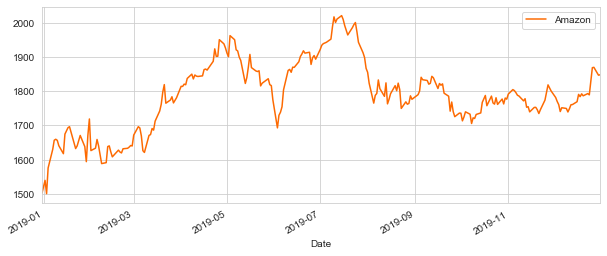

In [6]:
# plot of adjusted close price of Apple
AMZN['Adj Close'].plot(legend = True, figsize = (10, 4), label = 'Amazon', color = '#FD6A02')

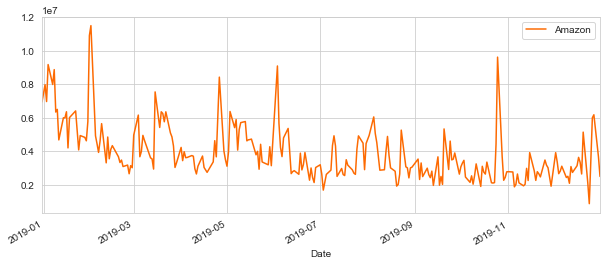

In [7]:
# plot of volume traded in Apple
AMZN['Volume'].plot(legend = True, figsize = (10, 4), label = 'Amazon', color = '#FD6A02')

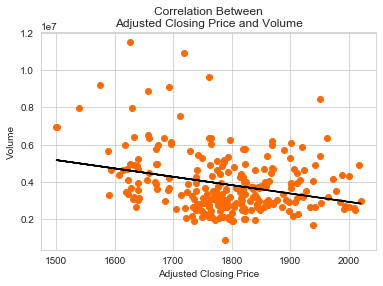

In [8]:
# scatterplot
plt.scatter(x = AMZN['Adj Close'], y = AMZN['Volume'], color = '#FD6A02')

# labeling
plt.xlabel('Adjusted Closing Price')
plt.ylabel('Volume')
plt.title('Correlation Between\nAdjusted Closing Price and Volume')

# trendline
adj_vol_fit = np.polyfit(AMZN['Adj Close'], AMZN['Volume'], 1)
adj_vol_polinom = np.poly1d(adj_vol_fit)
plt.plot(AMZN['Adj Close'], adj_vol_polinom(AMZN['Adj Close']), 'k-')

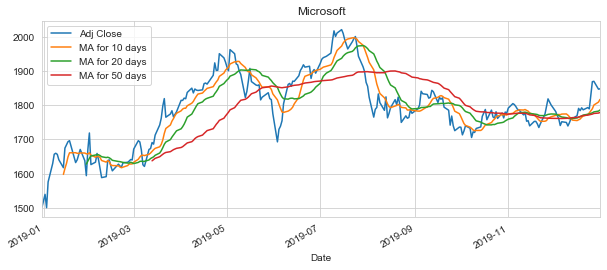

In [9]:
# calculating moving average
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AMZN[column_name] = DataFrame.rolling(AMZN['Adj Close'], ma).mean()
    
# plot the moving average
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10, 4), title = 'Microsoft')

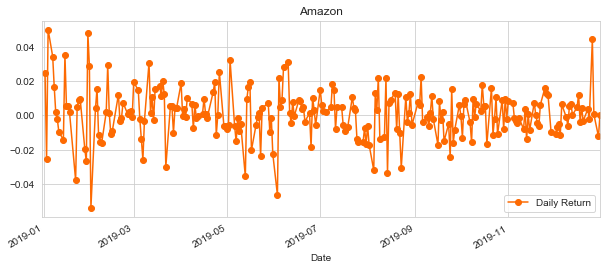

In [10]:
# creating percentage change
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

# plotting the daily return stock in percentage change
AMZN[['Daily Return']].plot(
    subplots = False, 
    figsize = (10, 4), 
    legend = True, 
    linestyle = '-', 
    marker = 'o', 
    color = '#FD6A02',
    title = 'Amazon'
)

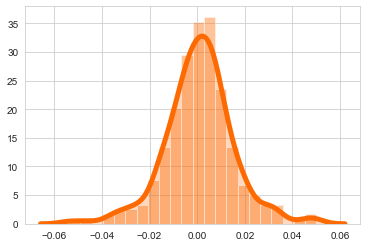

In [11]:
# plotting the daily return stock on average
sns.distplot(
    AMZN[['Daily Return']].dropna(), 
    hist = True,
    kde = True,
    kde_kws = {'linewidth': 5,
               'shade': True
              }, 
    color = '#FD6A02',
    label = 'Amazon'
)

In [12]:
# getting only the daily return in each technology corporation list
closing = web.DataReader('AMZN', 'yahoo', start, end)['Adj Close'].to_frame()
closing.head()

,Adj Close
Date,
2018-12-31,1501.969971
2019-01-02,1539.130005
2019-01-03,1500.280029
2019-01-04,1575.390015
2019-01-07,1629.510010


In [13]:
# identifying the percentage change in daily returns
tech_returns = closing.pct_change()
tech_returns.head()

,Adj Close
Date,
2018-12-31,NaN
2019-01-02,0.024741
2019-01-03,-0.025242
2019-01-04,0.050064
2019-01-07,0.034353


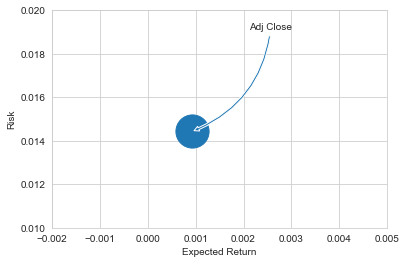

In [14]:
# drop NaN value from return columns
rets = tech_returns.dropna()

# set the size of points
area = np.pi*350

# scatter plot and labeling
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.xlim(-0.002, 0.005)
plt.ylim(0.010, 0.020)

# annotation
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), 
        xytext = (100, 100), 
        textcoords = 'offset points', 
        ha = 'right',
        va = 'bottom',
        arrowprops = dict(
            arrowstyle = 'simple',
            connectionstyle = 'arc3, rad = -0.3'
        )
    )

In [15]:
rets.head()

,Adj Close
Date,
2019-01-02,0.024741
2019-01-03,-0.025242
2019-01-04,0.050064
2019-01-07,0.034353
2019-01-08,0.016612


In [16]:
# applying bootstrap method 
AMZN_rets = rets.quantile(0.05)
print('95% of the times of simulations, the worst daily loss in investing on Amazon would not exceed {:.3f}%'.format(100 * abs(AMZN_rets['Adj Close'])))

95% of the times of simulations, the worst daily loss in investing on Amazon would not exceed 2.319%


Text(0.5, 1.0, 'Monte-Carlo Simulation for Amazon')

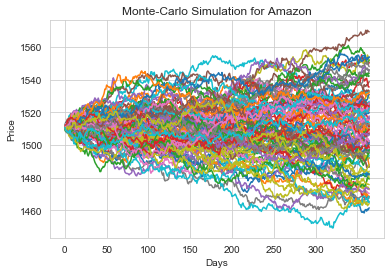

In [17]:
# setting up the necessary initial variables
days = 365
dt = 1 / days

AMZN_mu = rets.mean()
AMZN_sigma = rets.std()

# running Monte-Carlo simulation
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc = mu * dt, 
                                    scale = sigma * np.sqrt(dt)
                                   )
        drift[x] = mu * dt
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] + shock[x]))
    return price

# 100 simulations for Apple
AMZN_start_price = AMZN['Open'][0]

for run in range(100):
    AMZN_simulation = stock_monte_carlo(AMZN_start_price, days, AMZN_mu, AMZN_sigma)
    plt.plot(AMZN_simulation)

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte-Carlo Simulation for Amazon')

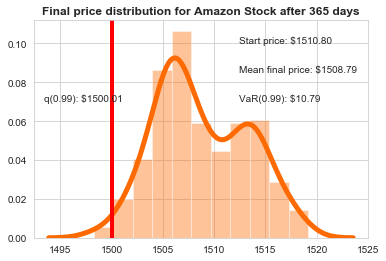

In [18]:
q = np.percentile(AMZN_simulation, 1)
sns.distplot(
    AMZN_simulation, 
    kde_kws = {'linewidth': 5}, 
    color = '#FD6A02')

# starting price
plt.figtext(0.6, 0.8,s="Start price: $%.2f" %AMZN_start_price)
# mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % AMZN_simulation.mean())

# variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (AMZN_start_price - q,))

# display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# title
plt.title(u"Final price distribution for Amazon Stock after %s days" % days, weight='bold');